In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
from scipy import signal
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_rean=pd.read_csv('./timelines_data/formed_timelines_2002/2002_ARCTIC_reanalysis.csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')
df_rean['75.532663_17.902096_v']=df_rean['75.532663_17.902096']-np.mean(df_rean['75.532663_17.902096'])
df_rean['76.006222_24.893752_v']=df_rean['76.006222_24.893752']-np.mean(df_rean['76.006222_24.893752'])
df_rean['75.210923_11.252254_v']=df_rean['75.210923_11.252254']-np.mean(df_rean['75.210923_11.252254'])
df_rean

,75.532663_17.902096,76.006222_24.893752,75.210923_11.252254,dates,75.532663_17.902096_v,76.006222_24.893752_v,75.210923_11.252254_v
0,-0.467534,-0.481149,-0.501914,2002-01-01,-0.029398,-0.018687,-0.018977
1,-0.432142,-0.434702,-0.472039,2002-01-02,0.005993,0.027760,0.010897
2,-0.459114,-0.463210,-0.460948,2002-01-03,-0.020979,-0.000748,0.021989
3,-0.433765,-0.454657,-0.445413,2002-01-04,0.004370,0.007804,0.037524
4,-0.465687,-0.433384,-0.460599,2002-01-05,-0.027551,0.029078,0.022338
...,...,...,...,...,...,...,...
360,-0.347166,-0.367057,-0.455382,2002-12-27,0.090969,0.095405,0.027554
361,-0.369520,-0.383776,-0.458292,2002-12-28,0.068616,0.078686,0.024645
362,-0.387371,-0.387457,-0.450590,2002-12-29,0.050765,0.075005,0.032346
363,-0.374828,-0.378650,-0.437877,2002-12-30,0.063308,0.083812,0.045059


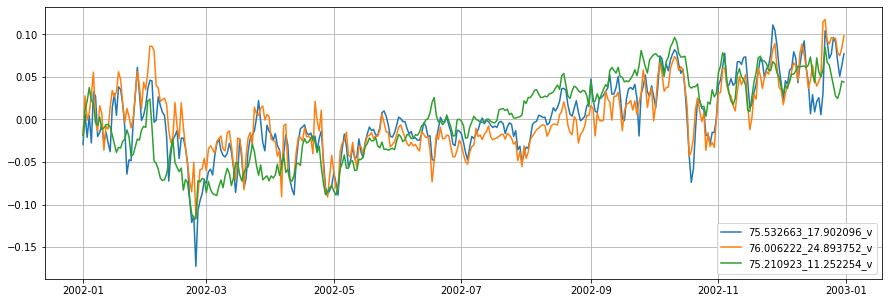

In [4]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(df_rean['dates'], df_rean['75.532663_17.902096_v'], label='75.532663_17.902096_v')
plt.plot(df_rean['dates'], df_rean['76.006222_24.893752_v'], label='76.006222_24.893752_v')
plt.plot(df_rean['dates'], df_rean['75.210923_11.252254_v'], label='75.210923_11.252254_v')
plt.legend()
plt.grid()
plt.show()

## Частотная оценка ряда

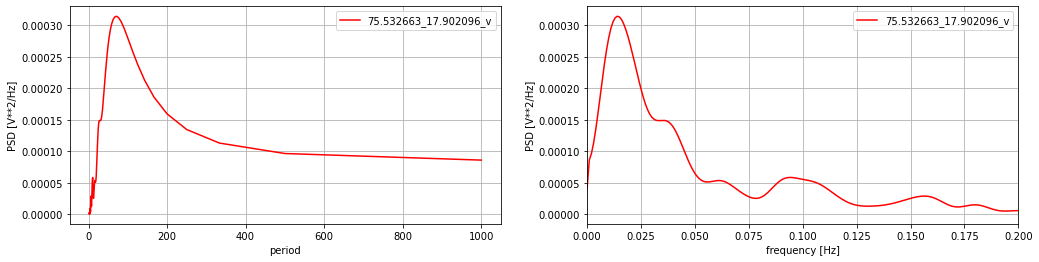

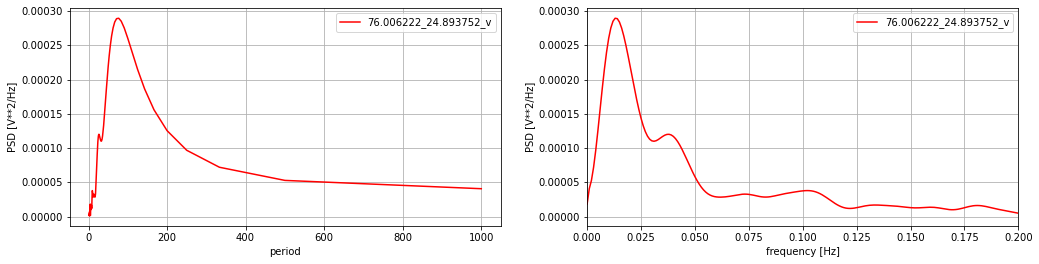

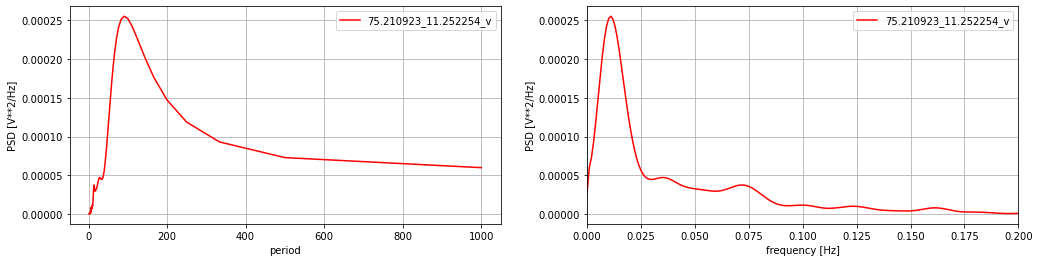

In [5]:
plt.rcParams['figure.figsize'] = [17, 4]

b_f, b_Pxx_den = signal.welch(df_rean['75.532663_17.902096_v'], fs=1, scaling='spectrum', nfft = 1000, nperseg=100)

plt.subplot(1, 2, 1)
plt.plot(1/b_f, b_Pxx_den, c='r', label='75.532663_17.902096_v')
plt.grid()
plt.legend()
plt.xlabel('period')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(1, 2, 2)
plt.plot(b_f, b_Pxx_den, c='r', label='75.532663_17.902096_v')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

##########################################
b_f, b_Pxx_den = signal.welch(df_rean['76.006222_24.893752_v'], fs=1, scaling='spectrum', nfft = 1000, nperseg=100)

plt.subplot(1, 2, 1)
plt.plot(1/b_f, b_Pxx_den, c='r', label='76.006222_24.893752_v')
plt.grid()
plt.legend()
plt.xlabel('period')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(1, 2, 2)
plt.plot(b_f, b_Pxx_den, c='r', label='76.006222_24.893752_v')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

##########################################
b_f, b_Pxx_den = signal.welch(df_rean['75.210923_11.252254_v'], fs=1, scaling='spectrum', nfft = 1000, nperseg=100)

plt.subplot(1, 2, 1)
plt.plot(1/b_f, b_Pxx_den, c='r', label='75.210923_11.252254_v')
plt.grid()
plt.legend()
plt.xlabel('period')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(1, 2, 2)
plt.plot(b_f, b_Pxx_den, c='r', label='75.210923_11.252254_v')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

## Оценка цикличности и остатков

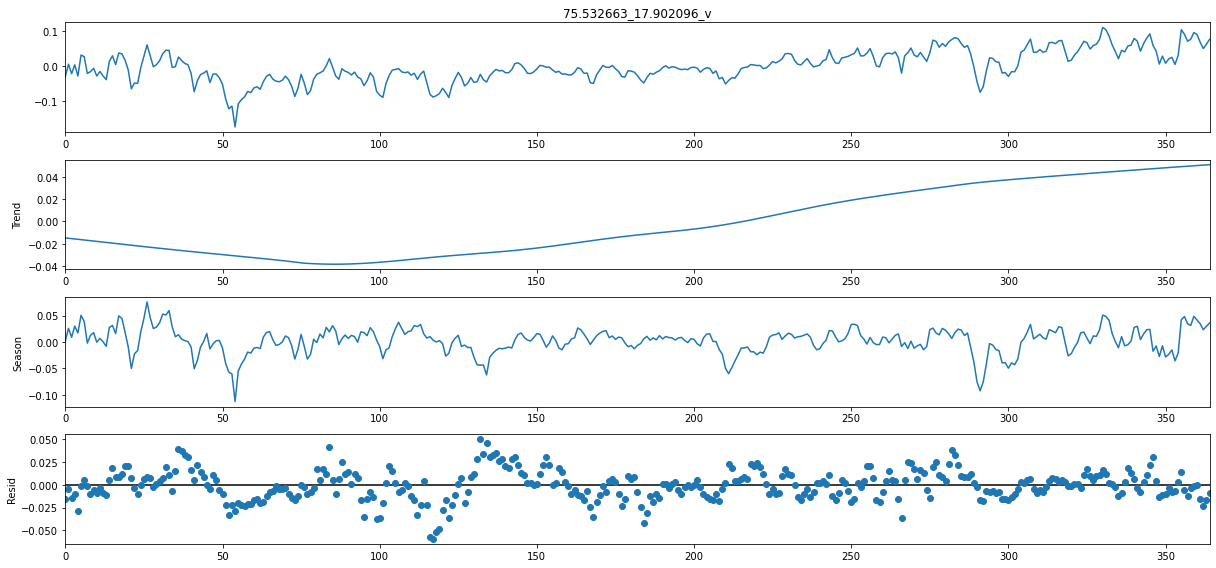

In [9]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_rean['75.532663_17.902096_v'], period=80)
res = stl.fit()
fig = res.plot()

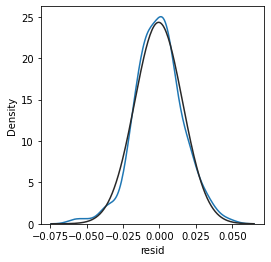

KstestResult(statistic=0.044104066716678214, pvalue=0.4635143148724885)


In [10]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)
if (ks[1]>=0.07):
    ds_no_resid=df_rean['75.532663_17.902096_v']-res.resid
    df_rean['75.532663_17.902096_no_res']=ds_no_resid
else:
    df_rean['75.532663_17.902096_no_res']=df_rean['75.532663_17.902096_v']

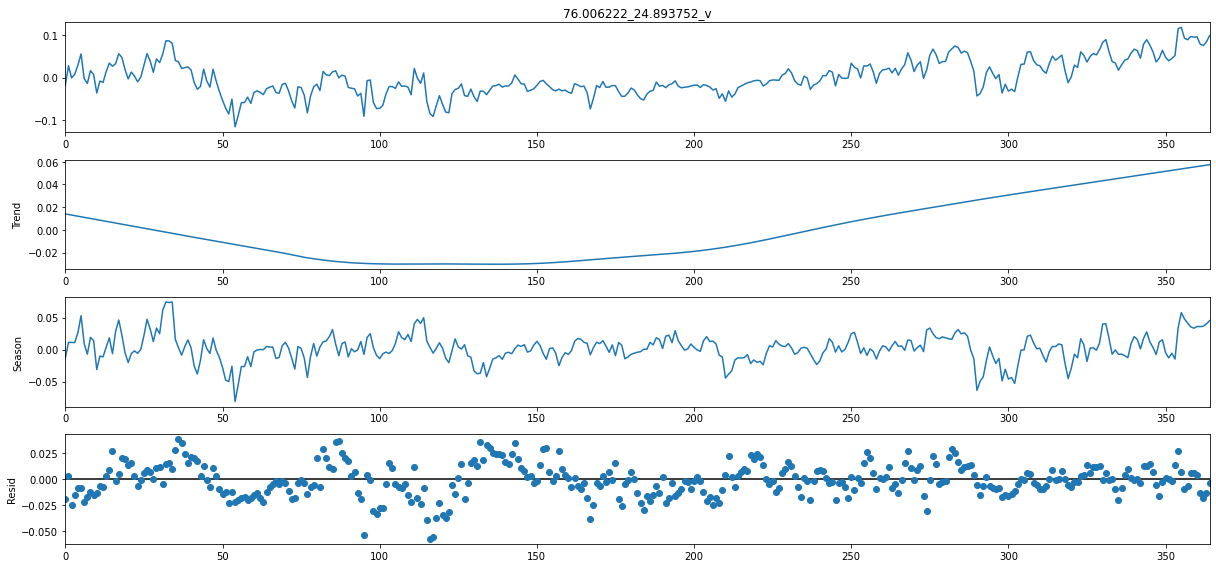

In [11]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_rean['76.006222_24.893752_v'], period=80)
res = stl.fit()
fig = res.plot()

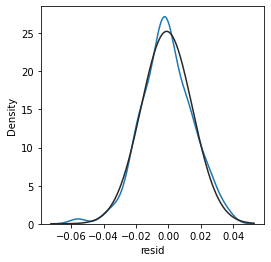

KstestResult(statistic=0.03918347334822625, pvalue=0.6151807205541587)


In [12]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)
if (ks[1]>=0.07):
    ds_no_resid=df_rean['76.006222_24.893752_v']-res.resid
    df_rean['76.006222_24.893752_no_res']=ds_no_resid
else:
    df_rean['76.006222_24.893752_no_res']=df_rean['76.006222_24.893752_v']

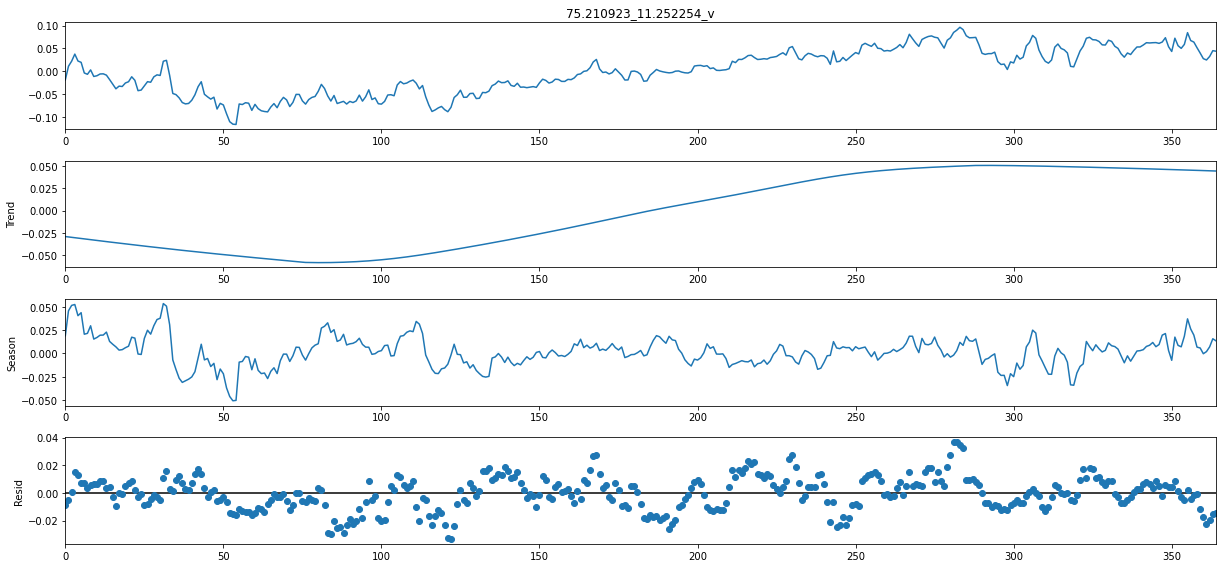

In [13]:
plt.rcParams['figure.figsize'] = [17, 8]
stl = STL(df_rean['75.210923_11.252254_v'], period=80)
res = stl.fit()
fig = res.plot()

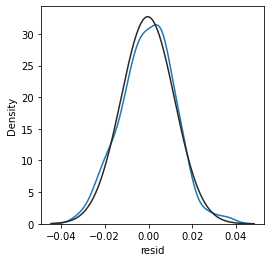

KstestResult(statistic=0.03293743618576972, pvalue=0.8107473392336634)


In [14]:
plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(res.resid, fit=norm, hist=False)
plt.show()
params = norm.fit(res.resid)
ks = kstest(res.resid, 'norm', params, N=1000)
print(ks)
if (ks[1]>=0.07):
    ds_no_resid=df_rean['75.210923_11.252254_v']-res.resid
    df_rean['75.210923_11.252254_no_res']=ds_no_resid
else:
    df_rean['75.210923_11.252254_no_res']=ds_no_resid=df_rean['75.210923_11.252254_v']

## Моделирование ряда без остатков (т.к. у них нормальное распределение)

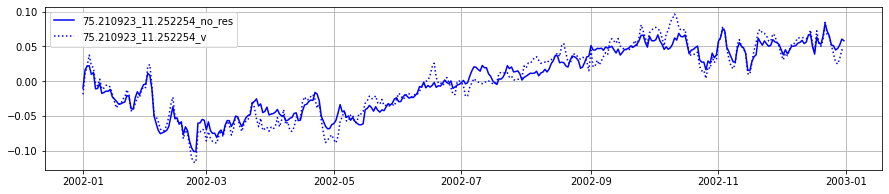

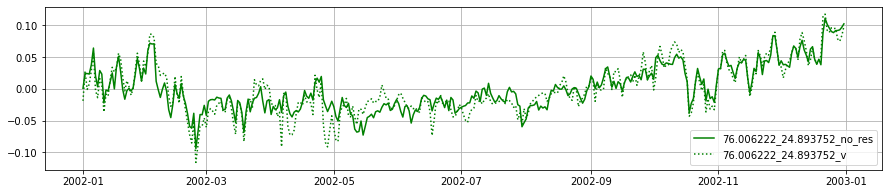

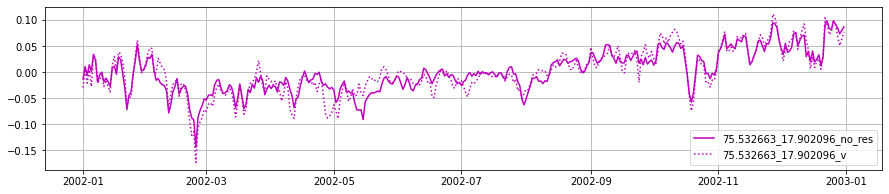

In [15]:
plt.rcParams['figure.figsize'] = [15, 3]

plt.plot(df_rean['dates'], df_rean['75.210923_11.252254_no_res'], label='75.210923_11.252254_no_res', c='b')
plt.plot(df_rean['dates'], df_rean['75.210923_11.252254_v'], label='75.210923_11.252254_v', c='b', linestyle=':')
plt.legend()
plt.grid()
plt.show()

plt.plot(df_rean['dates'], df_rean['76.006222_24.893752_no_res'], label='76.006222_24.893752_no_res', c='g')
plt.plot(df_rean['dates'], df_rean['76.006222_24.893752_v'], label='76.006222_24.893752_v', c='g', linestyle=':')
plt.legend()
plt.grid()
plt.show()

plt.plot(df_rean['dates'], df_rean['75.532663_17.902096_no_res'], label='75.532663_17.902096_no_res', c='m')
plt.plot(df_rean['dates'], df_rean['75.532663_17.902096_v'], label='75.532663_17.902096_v', c='m', linestyle=':')
plt.legend()
plt.grid()
plt.show()

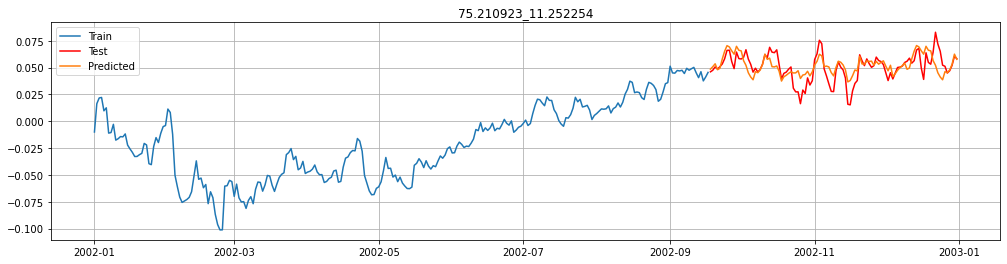

MSE =  0.00010455494443203526
MAE =  0.0076451549564423805
MAPE =  19.393
R^2 =  0.35714046543212485


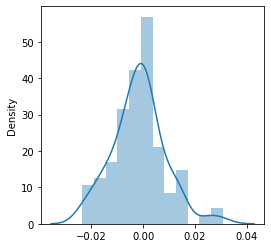

In [19]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA

test = df_rean['75.210923_11.252254_no_res'][-105:]
test.index = df_rean['dates'][-105:]
data = df_rean['75.210923_11.252254_no_res'][:-105]
data.index = df_rean['dates'][:-105]

stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
model_res = stlf.fit()
forecasts = model_res.forecast(105)
plt.rcParams['figure.figsize'] = [17, 4]
plt.plot(data, label='Train')
plt.plot(test, c='r', label='Test')
plt.plot(forecasts, label='Predicted')
plt.title('75.210923_11.252254')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))
print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
print("R^2 = ", r2_score(test, forecasts))

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-forecasts)
plt.show()

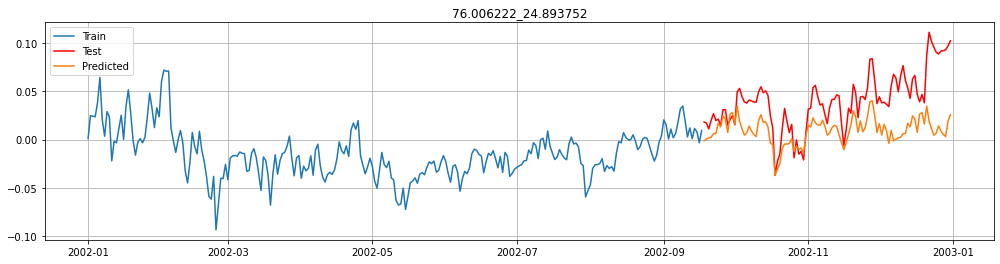

MSE =  0.0014808438240525583
MAE =  0.030931879555497543
MAPE =  47.669
R^2 =  -0.7260538322403154


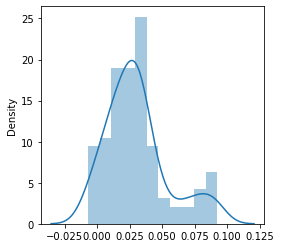

In [20]:
test = df_rean['76.006222_24.893752_no_res'][-105:]
test.index = df_rean['dates'][-105:]
data = df_rean['76.006222_24.893752_no_res'][:-105]
data.index = df_rean['dates'][:-105]

stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
model_res = stlf.fit()
forecasts = model_res.forecast(105)
plt.rcParams['figure.figsize'] = [17, 4]
plt.plot(data, label='Train')
plt.plot(test, c='r', label='Test')
plt.plot(forecasts, label='Predicted')
plt.title('76.006222_24.893752')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))
print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
print("R^2 = ", r2_score(test, forecasts))

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-forecasts)
plt.show()

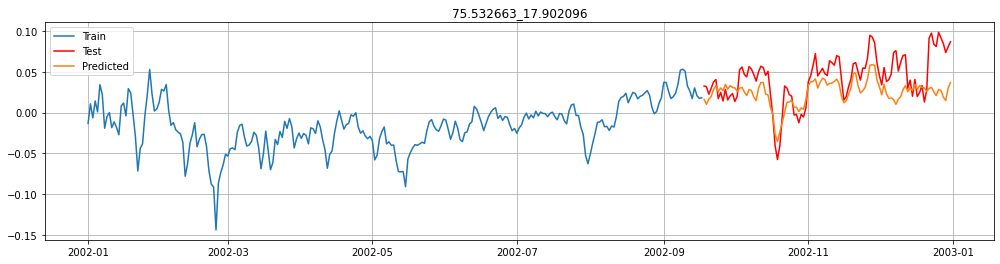

MSE =  0.000758388197802978
MAE =  0.02180891164975876
MAPE =  26.643
R^2 =  0.1215873662892396


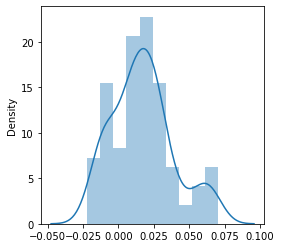

In [21]:
test = df_rean['75.532663_17.902096_no_res'][-105:]
test.index = df_rean['dates'][-105:]
data = df_rean['75.532663_17.902096_no_res'][:-105]
data.index = df_rean['dates'][:-105]

stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
model_res = stlf.fit()
forecasts = model_res.forecast(105)
plt.rcParams['figure.figsize'] = [17, 4]
plt.plot(data, label='Train')
plt.plot(test, c='r', label='Test')
plt.plot(forecasts, label='Predicted')
plt.title('75.532663_17.902096')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MSE = ", mean_squared_error(test, forecasts))
print("MAE = ", mean_absolute_error(test, forecasts))
print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
print("R^2 = ", r2_score(test, forecasts))

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-forecasts)
plt.show()

Вроде бы уже выглядит неплохо, но недоучет тренда выражается в завышении/занижении значений, при сохранении локальной динамики
___


ВАРИАНТЫ:
___

> 1) экзогенный фактор (NEMO или станции температуры/давления поискать, подвигать сам временной ряд)
>
>     - если берем NEMO, то сначала сравнить тренды, периодичность, сгладить если надо;     
>     - просчитать корреляции с эталонным рядом;
>     
> 2) просто сделать ансамбль из NEMO и того, что намоделировала ARIMA